# <font color="#0995EC"> I. Introduction </font>

_The objective of the project is to implement Reinforcement Learning techniques to solve the following:_
* **Maze**
* **BlackJack**

_The following classes are used for this purpose:_<br>
**1.** _Environment Class - It takes into account current state and the attributes associated with it._<br>
**2.** _Reinforcement Learning Agent(RLAgent) Class - This class performs actions in the environment using Reinforcement Learning_

# <font color="#FE2E64"> II. Problems </font>

## A. Maze Problem



### Problem
_In the Maze Problem we assume that our maze is divided up into squares. Each square of maze is either open('O') or occupied by a section of wall or obstacles('H') or a goal location ('G')._

_The objective is to reach the goal location from a starting position using either of the four possible actions: up, down, right and left._


### GridWorld
_In the GridWorld class we implement the maze environment. If we reach the goal then we are rewarded 30 point and if we hit a wall then we get -5 points as a reward and each step costs -1 point._

_We have:_<br>
**1.**  _Method_ *check\_state -* _to check whether the state is valid or not. It returns 'N' if the agent moves out of the grid world and returns 'F' if the we have a wrong input/invalid grid._

**2.** _Method next - It updates the current states based on the action. If the current state is 'H', that is agent hits the wall or 'N', agent moves out of the grid world then the reward is -5 points. Similarly, if we have a wrong input the method returns -5 point. But, if the current state is 'G', that the agent has reached the goal, method returns 30 points and every step costs -1 point._ 

In [1]:
import collections
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Simple Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [2]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO

### GridWorld Class


In [3]:
class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [4]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [5]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

In [6]:
#Testing the GridWorld
env = GridWorld('grid.txt')
env.print_map()
print(env.check_state([2,4]))
print(env.check_state([5,6]))
print(env.check_state([3,5]))
print(env.check_state([10,4]))
env.init([0,0])
print(env.next(1))  # right and -1 point for every step
print(env.next(3))  # down
print(env.next(0))  # left
print(env.next(2))  # up
print(env.next(2))  #up and agent moves out of the grid world that's why -5 points

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]
O
G
H
N
-1
-1
-1
-1
-5


## B. Blackjack-v0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


# <font color="#07D01E"> III. Methods </font>

### Temporal Difference Learning
Temporal difference (TD) learning considers that the agent knows only the partial information of the Markov Decision Processes. With only current and next state transition and without any model transition probability, TD lets the agent explore the environment to examine the random policy. With an estimate of the value function $V(s)$, $\hat{V}(s)$,
$$
    \begin{align}
        \\
        V(s_t) &\leftarrow R_{t+1} + \alpha (R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t))
    \end{align}
$$

Here, $\alpha$ represents the learning rate and $\gamma$ represents the discounting factor.
### **The TD approach I will be using is SARSA**
SARSA stands for State-Action-Reward-State-Action.
In this approach, we  first learn the Q value for each action and state. After that we set all the Q values to 0 and go around exploring the state-action. Once, the action has been applied to a state we check the state that is if the state has an undesirable output we will reduce the Q value of that action and so that this action is not selected next time and a better action will replace it. Similarly, if we receive a reward for that action then we will increase the Q value of that action so that it is more likely that, that action is selected next time.
SARSA is also called as on *on-policy control* and the formula is as follows: 

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

The Algorithm for SARSA is as follows:

![](http://incompleteideas.net/book/ebook/pseudotmp8.png)

### The **reason** for selecting **SARSA** 
Lets say, in SARSA, the agent starts in state 1, performs action 1, and gets a reward (reward 1). Now, it's in state 2 and performs another action (action 2) and gets the reward from this state (reward 2) before it goes back and updates the value of action 1 performed in state 1. In contrast, in Q-learning the agent starts in state 1, performs action 1 and gets a reward (reward 1), and then looks and sees what the maximum possible reward for an action is in state 2, and uses that to update the action value of performing action 1 in state 1.

Hence, In Q-learning it's simply the highest possible action that can be taken from state 2, and in SARSA it's the value of the actual action that was taken.
This means that SARSA takes into account the control policy by which the agent is moving, and incorporates that into its update of action values, whereas Q-learning simply assumes that an optimal policy is being followed. This is the reason why I have selected SARSA for this problem.

## RLAgent for Maze

The following methods are used:<br>
**1.** *Method* *\__init__: used for initializing the agent and the Q values for each state and action to 0.*<br>
**2.** *Method* *epsilon_greed: used for selecting the greedy move based on the Q-values of a given state 's'.* <br>
**3.** *Method* *train: used for training the Q values for the environment. This is the method where I have implemented SARSA Rule.*<br>
**4.** *Method* *test: used for executing the agent(which we have trained) on the given environment.*

In [7]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
 
    # epsilon value is the factor that prevents overfitting and s is the current state
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0], s[1]])
    
    
    def train(self, start, **params): #start state for the environment
        
        # parameters
        gamma = params.pop('gamma', 0.99) #discounting factor
        alpha = params.pop('alpha', 0.1) #learning frate
        epsilon= params.pop('epsilon', 0.1) # greedy choice to prevent over-fitting
        maxiter= params.pop('maxiter', 1000) # maximum number of times we run the experiment
        maxstep= params.pop('maxstep', 1000) # maximum number of steps for the experiment
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf # negative number when hits the wall
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        trace_all = [] # for all the traces
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                
                # update self.Q table 
                self.Q[s[0], s[1], a] += alpha * (r + gamma * self.Q[s1[0], s1[1], a1] - self.Q[s[0], s[1], a])
                
                if env.is_goal(): # reached the goal
                    
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1
            
            trace_all.append(trace)

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace_all, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        
        env.init(start) #tells the location of the start state
        s = env.get_cur_state()
        trace = np.array(coord_convert(s, self.size)) # trace is used to trace the path where we have been through
        
        for step in range(maxstep):    
            a = self.epsilon_greed(0, s) # to select greedy action
            env.next(a)
            s = env.get_cur_state()
            trace = np.vstack((trace, coord_convert(s, self.size)))

        return trace            

### BlackJack Game Introduction
_Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over.  They're playing against a fixed dealer. Face cards (Jack, Queen, King) have point value 10. Aces can either count as 11 or 1, and it's called 'usable' at 11. <br>
This game is placed with an infinite deck (or with replacement). The game starts with each (player and dealer) having one face up and one face down card. The player can request additional cards (hit=1) until they decide to stop (stick=0) or exceed 21 (bust). <br>
After the player sticks, the dealer reveals their face down card, and draws until their sum is 17 or greater. If the dealer goes bust the player wins. If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.<br>
The reward for winning is +1, drawing is 0, and losing is -1. The observation of a 3-tuple of: the players current sum, the dealer's one showing card (1-10 where 1 is ace), and whether or not the player holds a usable ace (0 or 1)._

### BlackJack Environment
_The blackjack environment is implemented inside the BlackJackEnv class. The class has the following functions:_<br>
**1.** *cmp:compares input of the numbers and returns the sign.*<br>
**2.** *draw\_card: it is used to draw a random card from the deck.*<br>
**3.** *draw\_hand: it is used to draw a hand of 2 random cards.<br>
**4.** *usable\_ace: it is used to define whether ace is usable as 11 or not.* <br>
**5.** *sum\_hand: returns the sum of current hand in total.*<br>
**6.** *is\_bust: if the sum of hand is greater than 21, it is a bust.*<br>
**7.** *score: returns zero if the hand is bust otherwise returns the sum of the  hand.*<br>
**8.** *is\_natural: it happens when the hand is a natural blackjack that is we have in hand an ace and a 10 or a jack or a queen or a king.<br>

We have the following methods in the class:<br>
**1.** *Method* *step: it performs action whether the player will hit(=1) or stick(=0). If the player decides to stick then the dealer will deal the cards and the returns the game's outcome.*<br>
**2**. *Method* *get_obs: it returns the sum of player, first card of the dealer and if player has a usable card as a tuple.*<br>
**3.** *Method* *reset: is used to reset the environment.*<br>

In [8]:
def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def draw_card():
    return int(np.random.choice(deck))


def draw_hand():
    return [draw_card(), draw_card()]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv: # Blackjack environment implementation 
    def __init__(self, natural=False):
        self.natural = natural
        # Start the first game
        self.reset()

    def step(self, action):
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card())
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card())
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self): # to reset the environment
        self.dealer = draw_hand()
        self.player = draw_hand()
        return self._get_obs()
 

### RLAgent for Gym (Blackjack-V0)
_The Reinforcement Learning agent for BlackJack environment is RLBlackJack class. Once again, my learning approach is SARSA for training the model. The class has the following methods:_<br>
**1.** *Method* *new\_state: it initializes Q-values to zero whenever a new state is encountered.<br>
**2.** Method* *epsilon\_greed: selects either hit or stick whichever action is optimal.*<br>
**3.** _Method_ _train: used for training the Q values for the environment. This is the method where I have implemented SARSA Rule._<br>
**4.** _Method_ _test: used for executing the agent(which we have trained) on the given environment._

In [9]:
class RLBlackJack: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    def __init__(self, env):
        self.env = env
        self.n_a = 2 # set number of actions to be either hit or stick
        self.Q = dict() # Q-values dictionary
        self.Q_hand = dict()
        for i in range(2, 22):
            if i < 12:
                self.Q_hand[i] = [0, 1]
            elif i < 18:
                self.Q_hand[i] = [0.5, 0.5]
            else:
                self.Q_hand[i] = [1, 0]
                
    def new_state(self, obs):
        if obs not in self.Q:
            self.Q[obs] = self.Q_hand[obs[0]][:]
        return self.Q[obs]
    
    def epsilon_greed(self, epsilon, obs):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.new_state(obs))
    
    def train(self, **params):
        # parameters
        gamma = params.pop('gamma', 0.99) # discounting factor
        alpha = params.pop('alpha', 0.1) # learing rate
        epsilon= params.pop('epsilon', 0.1) # greedy choice
        maxiter= params.pop('maxiter', 1000) # maximum number of times we run the experiment
        rewards = []  #rewards
        busts = []
        win = 0
        loss = 0
        draw = 0
        
        for j in range(maxiter):
            self.env.reset() # reset the environment
            finished = False
            
            # Let the game begin
            while not finished:
                # Get current observation
                obs = self.env._get_obs()
                a = self.epsilon_greed(epsilon, obs)
                obs1, r, finished = env.step(a)
                
                if obs1[0] > 21:
                    q1 = 0
                else:
                    q1 = self.epsilon_greed(epsilon, obs1)
                
                # Update self.Q table
                self.Q[obs][a] = self.new_state(obs)[a] + alpha * (r + gamma * q1 - self.new_state(obs)[a])
            busts.append(int(is_bust(self.env.player)))
            if r == 0:
                draw += 1
            elif r > 0:
                win += 1
            else:
                loss += 1
            rewards.append(r)
                    
        return win, loss, draw, rewards, busts

    def test(self):
        self.env.reset()
        trace = []
        actions = []
        finished = False
        while not finished:
            # Get current observation
            obs = self.env._get_obs()
            a = self.epsilon_greed(0, obs)
            
            trace.append(obs)
            actions.append(a)
            
            obs1, r, finished = env.step(a)
            
        trace.append(obs1)
        
        return r, trace, actions

# <font color="#C34F0D"> IV - Results </font>

### Utility functions for Plotting
The two additional visualizations that I have plotted are:<br>
**1.** *Number of times the agent hits aginst the wall*<br>
**2.** *Number of times the best action is selected to reach the goal location*

### GridWorld


In [10]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace_all, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(321)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(322)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(323)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(324)
    plot_trace(agent, start, trace, "trace of the last episode")
    
    # calculating number of times agent hits the wall and best move made by the agent
    wall_hits = []
    best_moves = []
    goal_pos = [env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1]
    for (i, trace) in enumerate(trace_all):
        wall = 0
        move = 0
        last_pos = trace[0]
        distance_before = math.sqrt((last_pos[0] - goal_pos[0]) ** 2 + (last_pos[1] - goal_pos[1]) ** 2)
        for pos in trace[1:]:
            distance = math.sqrt((pos[0] - goal_pos[0]) ** 2 + (pos[1] - goal_pos[1]) ** 2)
            if pos[0] == last_pos[0] and pos[1] == last_pos[1]:
                wall += 1
            if distance < distance_before:
                move += 1
            last_pos = pos
            distance_before = distance
        wall_hits.append(wall / (steps[i]))
        best_moves.append(move / (steps[i]))
       
    # plot number of times agent hits the wall
    ax4 = fig.add_subplot(325)
    plt.plot(wall_hits)
    plt.ylabel("Agent hits the wall")
    
    # plot best move made by the agent
    ax5 = fig.add_subplot(326)
    plt.plot(best_moves)
    plt.ylabel("Best move made by the agent")
    
    plt.plot()

### Training and Testing with GridWorld

In [11]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

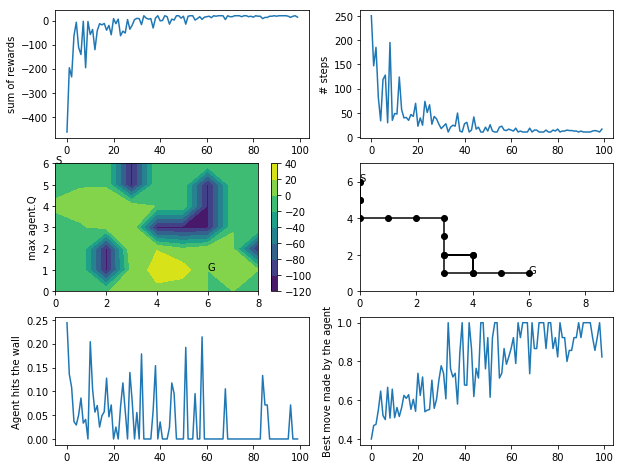

In [12]:
plot_train(agent, rtrace, steps, trace_all, trace, start)

__The following inference can be drawn from the above plots:__<br>
**1.** *The Sum of rewards shows that as the iterations increase the agent learns the best moves to reach the goal location. Hence, the sum of rewards reaches zero towards the 100th iteration.*<br>
**2.** *The number of steps taken by the agent to reach the goal also reduces as we go through numerous iterations.*<br>
**3.** *From the contour plot, it can be inferred that area towards top right and bottom left have not been explored. To explore these regions we can either change the starting position or increase number of iterations.*<br>
**4.** *The plot of trace is pretty straight forward, it shows how the agent has reached the gaol location that is what steps have been taken by the agent to reach the goal location.*<br>
**5.** *The fifth plot describes how many times the agent hits the wall of the grid. As the number of iterations increase, the agent learns how to avoid the walls in order to reach the goal location.*<br>
**6.** *Best moves made by the agent to reach the goal, also explains the fact that the more we train our agent the more optimum it will become.*<br>

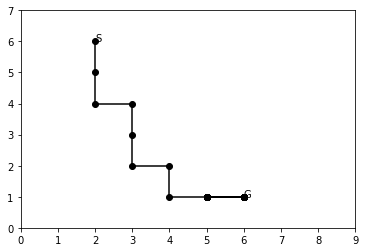

In [13]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

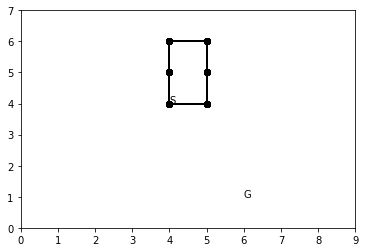

In [14]:
test_start = [2,4]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

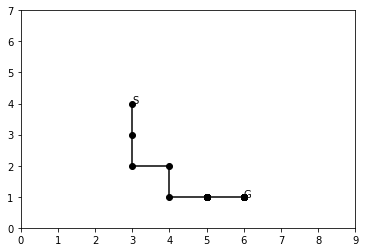

In [15]:
test_start = [2,3]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

**Parameters for $\gamma$, $\alpha$, and $\epsilon$**<br>
**1.** _$\gamma$ refers to the Discounting Factor that determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward._<br>
**2.** _$\alpha$  refers to the Learning Rate that determines to what extent newly acquired information overrides old information. A factor of 0 makes the agent learn nothing, while a factor of 1 makes the agent consider only the most recent information._<br>
**3.** *$\epsilon$ refers to the greedy choice made by the agent. If we increase the $\epsilon$ value it means that the agent can explore areas of the grid which hasn't been explored but this would also mean deviating from the gaol location. Hence, epsilon value should be lower to get the optimal solution.*<br>

#### Experiment 1
**Let's see what affect does $\gamma$ (discounting factor) has if we reduce it**

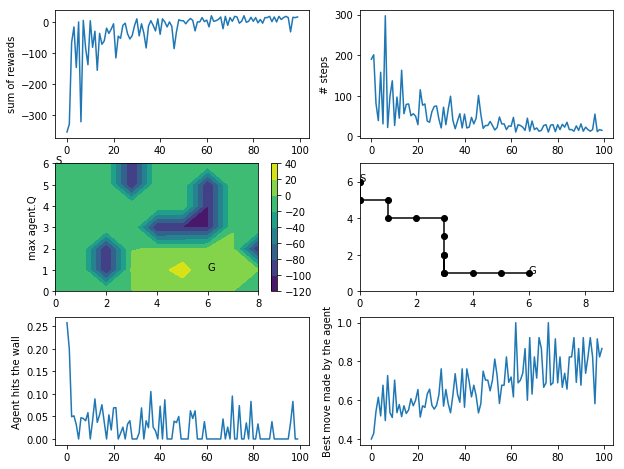

In [16]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.4, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace_all, trace, start)

**We can say that till some extent we can reduce the value of $\gamma$, if we reduce it too much it may not be able to converge and since the $\gamma$ value is low, the number of hits against the wall are increased and also the agent is not able to make better selection for moves that should be taken in order to reach the goal.**

#### Experiment 2
**Let's see what affect does $\alpha$ (learning rate) has if we increase it**

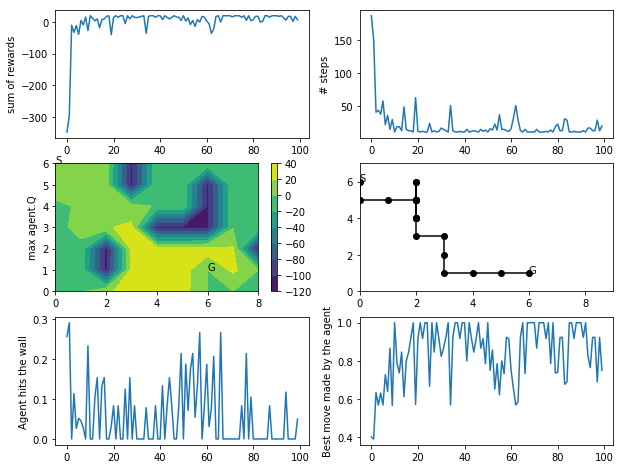

In [17]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.80, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace_all, trace, start)

**It is not a good idea to increase the value of alpha as the algorithm only converges when the learning rate is required to be decrease to zero. Hence, optimal value of $\alpha$ should be 0.1 which is evident from the fact that the agent hits a wall a lot of times and it is not able to select the best move to reach the goal.**

#### Experiment 3
**Increasing the $\epsilon$ value**

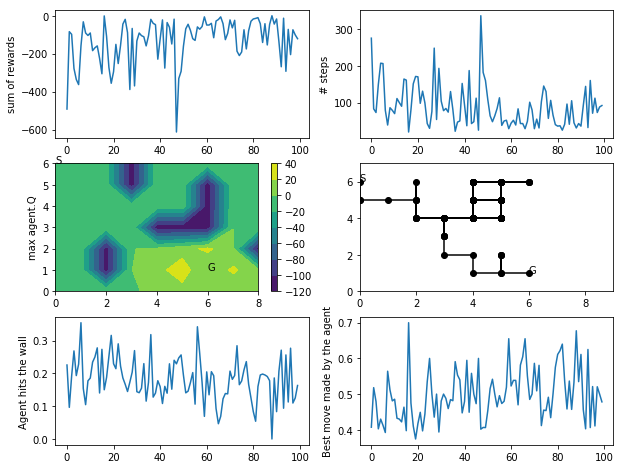

In [18]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.80, 
                                   maxiter=100, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace_all, trace, start)

**If we increase the $\epsilon$ value, the agent explores the area before reaching the goal location.Higher the value of $\epsilon$ the more area agent will explore in the grid before reaching the goal. Hence, it is advisable to have lower $\epsilon$ value.**

#### Experiment 4
**If we reduce the maximum number of steps**

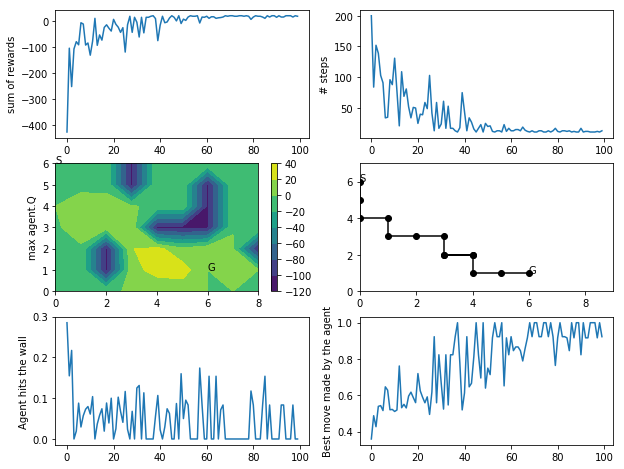

In [19]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=200)
plot_train(agent, rtrace, steps, trace_all, trace, start)

**We can see that we don't need 1000 steps to reach our goal location this can be achieved with fewer steps as well.**

#### Experiment 5
**Now let's see what happens if we reduce the number of iterations**

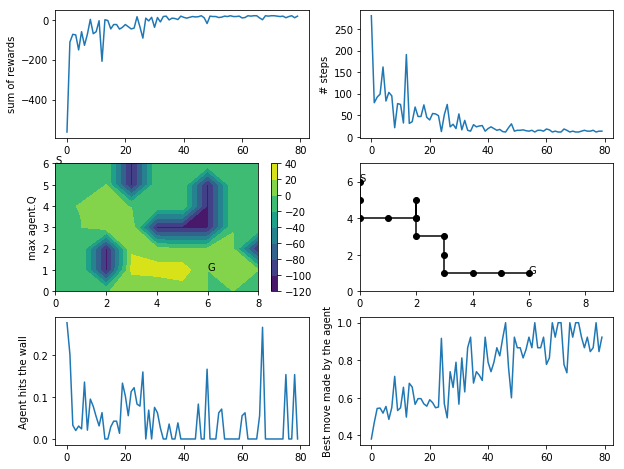

In [20]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace_all, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=80, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace_all, trace, start)

**Again, we don't need the iterations to be 100 even though less number of iterations may not give the optimal Q-value but large number of iterations can also make the model deviate from the optimal Q-value**

### BlackJack

Win =40.1%
Draw =7.9%
Loss =52.0%


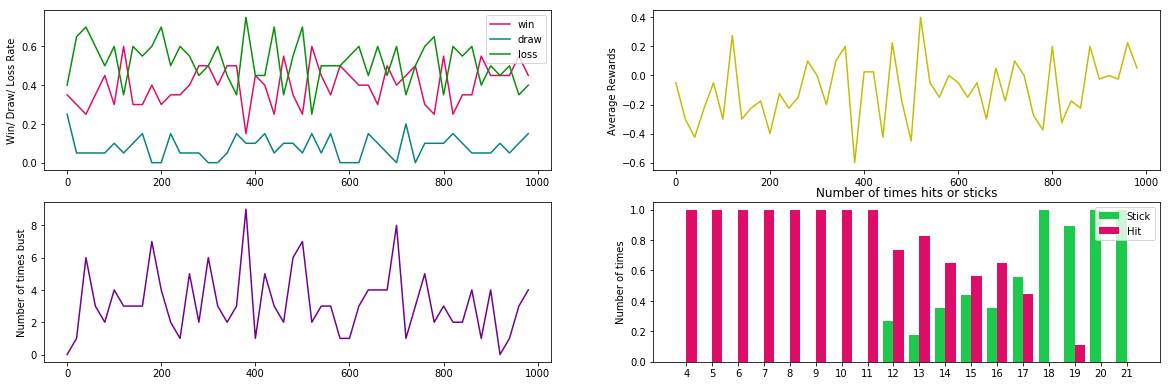

In [21]:
def blackjack_plots(win, loss, draw, rewards, busts, maxiter):
    print('Win =' + str(win/10) + '%')
    print('Draw =' + str(draw/10) + '%')
    print('Loss =' + str(loss/10) + '%')

    counts = {}
    for obs in agent.Q.keys():
        card = obs[0]
        q = agent.Q[obs]

        if card not in counts:
            counts[card] = [0, 0]

        if q[0] > q[1]:
            counts[card][0] += 1
        elif q[0] < q[1]:
            counts[card][1] += 1
        else:
            counts[card][0] += 1
            counts[card][1] += 1

    cards = list(counts.keys())
    cards.sort()

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(324)

    plt.bar([card - 0.2 for card in cards], [counts[card][0] / (counts[card][0] + counts[card][1]) for card in cards], width=0.4, align='center', label='Stick',color='#1ECA4E')
    plt.bar([card + 0.2 for card in cards], [counts[card][1] / (counts[card][0] + counts[card][1]) for card in cards], width=0.4, align='center', label='Hit', color='#DE0D67')
    plt.title("Number of times hits or sticks")
    plt.ylabel("Number of times")
    plt.xticks(cards)
    plt.legend()

    interval = 1 if maxiter < 50 else maxiter // 50
    num_busts = []
    avg_rewards = []
    fraction_win = []
    fraction_draw = []
    fraction_loss = []

    i = 0
    while i < maxiter:
        num_busts.append(sum(busts[i:interval + i]))
        avg_rewards.append(np.mean(rewards[i:interval + i]))
        fraction_win.append((rewards[i:interval + i].count(1) + rewards[i:interval + i].count(1.5)) / interval)
        fraction_draw.append((rewards[i:interval + i].count(0)) / interval)
        fraction_loss.append((rewards[i:interval + i].count(-1)) / interval)
        i += interval

    # Win/Draw/Loss rate
    ax = fig.add_subplot(321)
    plt.plot(np.arange(0, maxiter, maxiter // 50), fraction_win, label='win', color='#DE0D67')
    plt.plot(np.arange(0, maxiter, maxiter // 50), fraction_draw, label='draw', color='#05837D')
    plt.plot(np.arange(0, maxiter, maxiter // 50), fraction_loss, label='loss', color='#069008')
    plt.legend()
    plt.ylabel('Win/ Draw/ Loss Rate')

    # Number of busts
    ax = fig.add_subplot(323)
    plt.plot(np.arange(0, maxiter, maxiter // 50), num_busts, color='#70028E')
    plt.ylabel("Number of times bust")

    # Average Rewards
    ax = fig.add_subplot(322)
    plt.plot(np.arange(0, maxiter, maxiter // 50), avg_rewards, color='#C3BD04')
    plt.ylabel("Average Rewards")

    plt.show()
    
env = BlackjackEnv(natural=True)
agent = RLBlackJack(env)
maxiter = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                               alpha=0.1, 
                                               epsilon=0.1, 
                                               maxiter=maxiter)
blackjack_plots(win, loss, draw, rewards, busts, maxiter)

#### Experiment 1
**Let's see what affect does $\gamma$ (discounting factor) has if we reduce it**

Win =41.5%
Draw =8.6%
Loss =49.9%


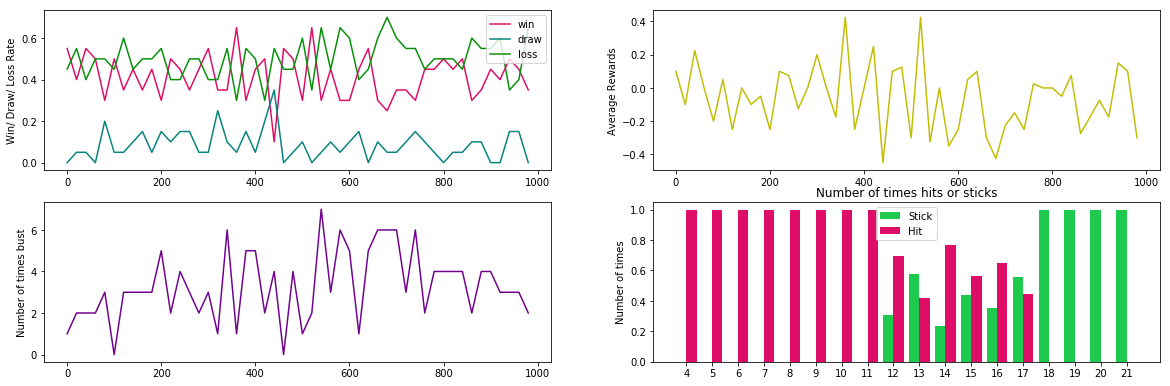

In [22]:
agent = RLBlackJack(env)
maxiter = 1000
win, loss, draw, rewards, busts = agent.train(gamma=0.001, 
                                               alpha=0.1, 
                                               epsilon=0.1, 
                                               maxiter=maxiter)
blackjack_plots(win, loss, draw, rewards, busts, maxiter)

**Lower value of $\gamma$ means that the agent only considers current rewards. Hence, it is advisable to have higher $\gamma$ value.**

#### Experiment 2
**Let's see what affect does $\alpha$ (learning rate) has if we increase it**

Win =38.6%
Draw =8.4%
Loss =53.0%


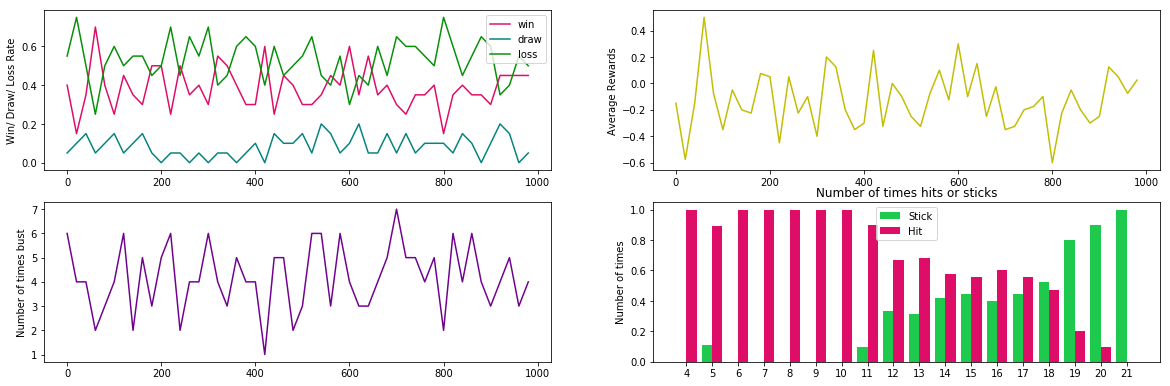

In [23]:
win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                               alpha=0.999, 
                                               epsilon=0.1, 
                                               maxiter=maxiter)
blackjack_plots(win, loss, draw, rewards, busts, maxiter)

**Same result as above, the algorithm converges under some technical conditions on the learning rate that required it to decrease to zero. Hence, $\alpha$ should have a value closer to zero**

#### Experiment 3
**Increasing the $\epsilon$ value**

Win =28.1%
Draw =3.7%
Loss =68.2%


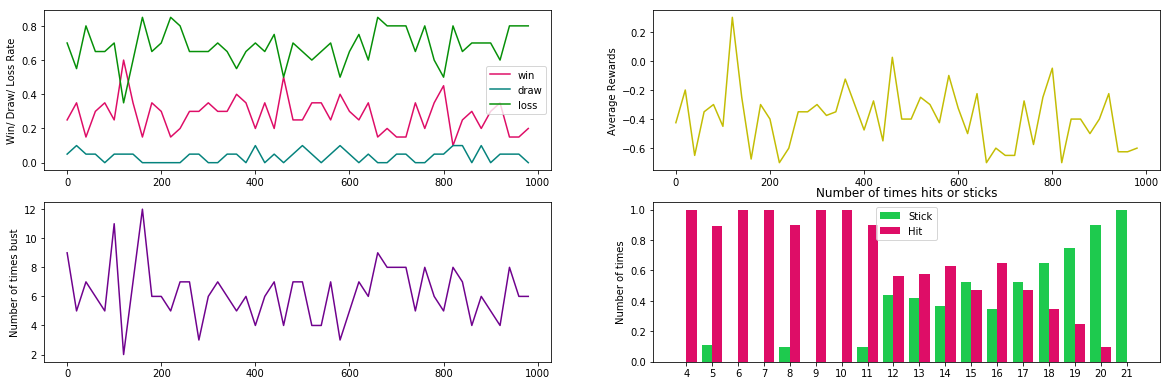

In [24]:
win, loss, draw, rewards, busts = agent.train(gamma=0.99, 
                                               alpha=0.1, 
                                               epsilon=0.99, 
                                               maxiter=maxiter)
blackjack_plots(win, loss, draw, rewards, busts, maxiter)

**Increasing $\epsilon$ would mean that the agent would want to make a greedy choice that it it would want to go closer to 21 and in order to do so it will get bust a lot of times. Therefore, the win percentage is lower. Hence, it is advisable to have $\epsilon$ value lower.**